In [1]:
import pandas as pd
import numpy as np
from math import asin, sqrt, sin, cos, acos, radians, pi
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ofac.csv', encoding='utf8')

In [3]:
df.shape

(66920, 7)

In [4]:
df.head()

,Unnamed: 0,City Names,Country Codes,Country Names,IP Addresses,"Longtitude, Latitude",Region Names
0,0,Utrecht,NL,Netherlands,145.161.251.84,"[5.1228, 52.0916]",Provincie Utrecht
1,1,NaN,DE,Germany,79.213.25.185,"[9.491, 51.2993]",NaN
2,2,Sulzbach,DE,Germany,2a02:810c:580:1cf4:19cf:dae7:e939:a6ea,"[7.0667, 49.3]",Saarland
3,3,NaN,JP,Japan,133.190.247.59,"[139.69, 35.69]",NaN
4,5,NaN,DE,Germany,213.68.153.184,"[9.491, 51.2993]",NaN


In [5]:
df['Longtitude, Latitude'] = df['Longtitude, Latitude'].apply(literal_eval)

In [6]:
df = df[df['Longtitude, Latitude'] != '[None, None]']
df = df[['City Names', 'Country Codes', 'Country Names', 'IP Addresses', 'Longtitude, Latitude', 'Region Names']]

In [7]:
df.shape

(66920, 6)

In [8]:
df.dtypes

City Names              object
Country Codes           object
Country Names           object
IP Addresses            object
Longtitude, Latitude    object
Region Names            object
dtype: object

Functions for distance using spherical coordinates

In [9]:
print type(df.at[0, 'Longtitude, Latitude'])

<type 'list'>


Find the distances between Crimea and each longtitude and latitude in the dataframe

In [10]:
def distance(coordinates, long2, lat2, distance_formula, radius_km):
    if isinstance(coordinates[0], float) and isinstance(coordinates[1], float):
        long1 = radians(coordinates[0])
        lat1 = radians(coordinates[1])
        d = distance_formula(long1, lat1, long2, lat2)
        distance_km = radius_km * d
        return distance_km
    else:
        return 1
    
def haversine(long1, lat1, long2, lat2):
    return 2*asin(sqrt((sin((lat2-lat1)/2))**2 + cos(lat1)*cos(lat2)*(sin((long2-long1)/2))**2))

df['Distance'] = df['Longtitude, Latitude'].apply(distance, args=(45.3453, 34.4997, haversine, 6371))

Check to see if there were any non-float values in the dataframe

In [11]:
df = df[df['Distance'] != 1.0]

In [12]:
df.head()

,City Names,Country Codes,Country Names,IP Addresses,"Longtitude, Latitude",Region Names,Distance
0,Utrecht,NL,Netherlands,145.161.251.84,"[5.1228, 52.0916]",Provincie Utrecht,10864.034455
1,NaN,DE,Germany,79.213.25.185,"[9.491, 51.2993]",NaN,11177.626232
2,Sulzbach,DE,Germany,2a02:810c:580:1cf4:19cf:dae7:e939:a6ea,"[7.0667, 49.3]",Saarland,11081.942111
3,NaN,JP,Japan,133.190.247.59,"[139.69, 35.69]",NaN,12299.170429
4,NaN,DE,Germany,213.68.153.184,"[9.491, 51.2993]",NaN,11177.626232


In [13]:
def radius(area):
    return sqrt(area/pi)
crimean_distance = radius(27000)

In [14]:
df['Crimean'] = df['Distance'].apply(lambda x: 1 if x <= crimean_distance else 0)

In [15]:
df['Crimean'].value_counts()

0    66874
Name: Crimean, dtype: int64

In [16]:
lat_long = df['Longtitude, Latitude'].tolist()

longs = [i[0] for i in lat_long]
lats = [i[1] for i in lat_long]

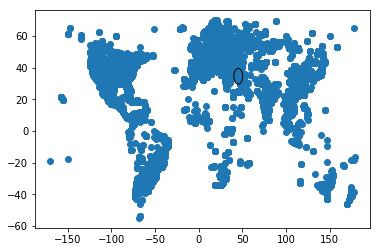

In [17]:
circle = plt.Circle((45.3453, 34.4997), fill=False)
ax = plt.gca()
ax.scatter(longs, lats)
ax.add_artist(circle)
plt.show()

Analysis of IP Addresses for Sanctioned Regions

In [22]:
country_df = df.groupby('Country Names')['IP Addresses'].count()

In [19]:
sanctions_df = country_df.loc[['Iran', 'Iraq', 'North Korea', 'Syria', 'Cuba', 'Sudan']]

In [20]:
sanctions_df

Country Names
Iran           128.0
Iraq             4.0
North Korea      NaN
Syria           12.0
Cuba             4.0
Sudan           14.0
Name: IP Addresses, dtype: float64

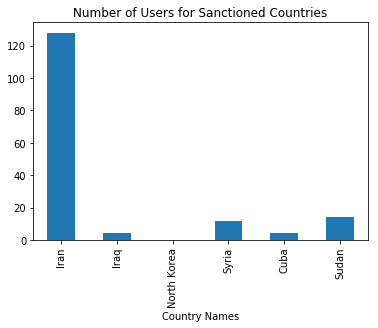

In [29]:
sanctions_df.plot.bar(title='Number of Users for Sanctioned Countries')

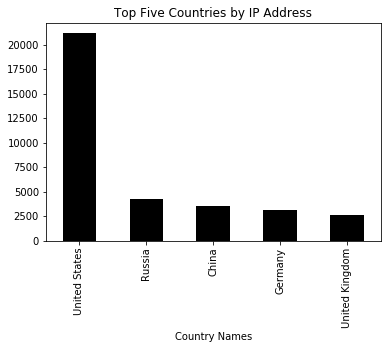

In [28]:
x = country_df.sort_values(ascending=False)
top_five = x[0:5]
top_five.plot(kind='bar', color='k', title='Top Five Countries by IP Address')